# CAPSTONE PROJECT: AMAZON REVIEW ANALYSIS

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# Datasets were downloaded from:

# Datasets chosen in the following two categories:

1.Toys and Games

2.Baby

# Data Preparation:

1.Importing the json files.

2.Viewing the data

3.Converting to .csv and storing it

4.Data Cleaning by- finding null values, dropping columns that are not needed for analysis, converting the unix date format  to readable datetime.

5.Renaming columns for better understanding.

 **STEPS PERFORMED:**

1.Importing required libraries

2.Creating sentiment coloumn

3.Punctuation and stop words cleaning on review coloumn

5.Word cloud

6.Label encoding of sentiment coloumn

7.Lemmatization

8.Model building

9.Checking accuracy of Logistic regression,KNN and Decision Tree classifier


11.Converting final dataset to csv

In [2]:
import numpy as np
import pandas as pd
import json
import csv

In [19]:
baby_review = pd.read_json('C:/NIIT/Final_Project/files/Baby_5.json', lines=True)
baby_review

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1HK2FQW6KXQB2,097293751X,"Amanda Johnsen ""Amanda E. Johnsen""","[0, 0]",Perfect for new parents. We were able to keep ...,5,Awesine,1373932800,"07 16, 2013"
1,A19K65VY14D13R,097293751X,angela,"[0, 0]",This book is such a life saver. It has been s...,5,Should be required for all new parents!,1372464000,"06 29, 2013"
2,A2LL1TGG90977E,097293751X,Carter,"[0, 0]",Helps me know exactly how my babies day has go...,5,Grandmother watching baby,1395187200,"03 19, 2014"
3,A5G19RYX8599E,097293751X,cfpurplerose,"[0, 0]",I bought this a few times for my older son and...,5,repeat buyer,1376697600,"08 17, 2013"
4,A2496A4EWMLQ7,097293751X,C. Jeter,"[0, 0]",I wanted an alternative to printing out daily ...,4,Great,1396310400,"04 1, 2014"
...,...,...,...,...,...,...,...,...,...
160787,A30J0DKNKCF7SR,B00L13XFIE,SD,"[0, 0]",Bought this as a baby gift and my friend heard...,5,Great baby gift,1391126400,"01 31, 2014"
160788,AG4E44KM93P4L,B00L13XFIE,Silofish,"[0, 1]",I am new to cloth diapering. I was leery that ...,4,Not too bulky,1343606400,"07 30, 2012"
160789,A2UZUH4QHV4HA1,B00L13XFIE,"S. Smith ""sunnshyne309""","[0, 0]",My friend is planning on cloth diapering and I...,5,great help!,1364256000,"03 26, 2013"
160790,A2Z26PUQPMT5JV,B00L13XFIE,Stephanie S. Kim,"[0, 0]",We LOVE the organic cotton/hemp inserts. They'...,5,Love these diapers!,1391731200,"02 7, 2014"


In [20]:
baby_review.shape

(160792, 9)

In [21]:
baby_review.dtypes

reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object

In [22]:
baby_review.isnull().sum()

reviewerID           0
asin                 0
reviewerName      1365
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [23]:
baby_review.dropna(inplace=True)

In [24]:
baby_review.shape

(159427, 9)

In [25]:
baby_review['unixReviewTime'] = pd.to_datetime(baby_review['unixReviewTime'],unit='s')

In [26]:
baby_review['reviewTime'] = pd.to_datetime(baby_review['reviewTime'])

In [27]:
baby_review1=baby_review.drop(['reviewerName'], axis = 1)
#baby_review1

In [28]:
help1=pd.DataFrame(baby_review1['helpful'].tolist(),columns=['h1','h2'])

In [29]:
baby_review1["helpful_score"]=(help1["h1"]/help1["h2"])

In [30]:
baby_review1['helpful_score']=baby_review1['helpful_score'].fillna(0)

In [31]:
baby_review1.tail()

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_score
160787,A30J0DKNKCF7SR,B00L13XFIE,"[0, 0]",Bought this as a baby gift and my friend heard...,5,Great baby gift,2014-01-31,2014-01-31,0.0
160788,AG4E44KM93P4L,B00L13XFIE,"[0, 1]",I am new to cloth diapering. I was leery that ...,4,Not too bulky,2012-07-30,2012-07-30,0.0
160789,A2UZUH4QHV4HA1,B00L13XFIE,"[0, 0]",My friend is planning on cloth diapering and I...,5,great help!,2013-03-26,2013-03-26,0.0
160790,A2Z26PUQPMT5JV,B00L13XFIE,"[0, 0]",We LOVE the organic cotton/hemp inserts. They'...,5,Love these diapers!,2014-02-07,2014-02-07,0.0
160791,A3CIIOMK18CHXM,B00L13XFIE,"[1, 1]",These are great. I should have bought hemp ins...,5,Really absorbent,2012-12-18,2012-12-18,0.0


In [32]:
baby_review2=baby_review1.iloc[:,[0,1,3,4,5,7,8]]

In [33]:
baby_review2

,reviewerID,asin,reviewText,overall,summary,reviewTime,helpful_score
0,A1HK2FQW6KXQB2,097293751X,Perfect for new parents. We were able to keep ...,5,Awesine,2013-07-16,0.0
1,A19K65VY14D13R,097293751X,This book is such a life saver. It has been s...,5,Should be required for all new parents!,2013-06-29,0.0
2,A2LL1TGG90977E,097293751X,Helps me know exactly how my babies day has go...,5,Grandmother watching baby,2014-03-19,0.0
3,A5G19RYX8599E,097293751X,I bought this a few times for my older son and...,5,repeat buyer,2013-08-17,0.0
4,A2496A4EWMLQ7,097293751X,I wanted an alternative to printing out daily ...,4,Great,2014-04-01,0.0
...,...,...,...,...,...,...,...
160787,A30J0DKNKCF7SR,B00L13XFIE,Bought this as a baby gift and my friend heard...,5,Great baby gift,2014-01-31,0.0
160788,AG4E44KM93P4L,B00L13XFIE,I am new to cloth diapering. I was leery that ...,4,Not too bulky,2012-07-30,0.0
160789,A2UZUH4QHV4HA1,B00L13XFIE,My friend is planning on cloth diapering and I...,5,great help!,2013-03-26,0.0
160790,A2Z26PUQPMT5JV,B00L13XFIE,We LOVE the organic cotton/hemp inserts. They'...,5,Love these diapers!,2014-02-07,0.0


In [34]:
baby_review2.dtypes

reviewerID               object
asin                     object
reviewText               object
overall                   int64
summary                  object
reviewTime       datetime64[ns]
helpful_score           float64
dtype: object

In [35]:
baby_review2.groupby(['overall']).size()

overall
1     7774
2     9158
3    17147
4    32733
5    92615
dtype: int64

In [37]:
#baby_review2.to_csv("baby_review.csv")

# Importing libraries

In [1]:
#Basic libraries
import pandas as pd 
import numpy as np 


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS

# Machine Learning libraries
import sklearn 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, roc_auc_score,roc_curve
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import neighbors
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier

#Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries

from collections import defaultdict
from collections import Counter


In [40]:
baby_review_2 = pd.read_csv('baby_review.csv')
baby_review_2

,Unnamed: 0,reviewerID,asin,reviewText,overall,summary,reviewTime,helpful_score
0,0,A1HK2FQW6KXQB2,097293751X,Perfect for new parents. We were able to keep ...,5,Awesine,2013-07-16,0.0
1,1,A19K65VY14D13R,097293751X,This book is such a life saver. It has been s...,5,Should be required for all new parents!,2013-06-29,0.0
2,2,A2LL1TGG90977E,097293751X,Helps me know exactly how my babies day has go...,5,Grandmother watching baby,2014-03-19,0.0
3,3,A5G19RYX8599E,097293751X,I bought this a few times for my older son and...,5,repeat buyer,2013-08-17,0.0
4,4,A2496A4EWMLQ7,097293751X,I wanted an alternative to printing out daily ...,4,Great,2014-04-01,0.0
...,...,...,...,...,...,...,...,...
159422,160787,A30J0DKNKCF7SR,B00L13XFIE,Bought this as a baby gift and my friend heard...,5,Great baby gift,2014-01-31,0.0
159423,160788,AG4E44KM93P4L,B00L13XFIE,I am new to cloth diapering. I was leery that ...,4,Not too bulky,2012-07-30,0.0
159424,160789,A2UZUH4QHV4HA1,B00L13XFIE,My friend is planning on cloth diapering and I...,5,great help!,2013-03-26,0.0
159425,160790,A2Z26PUQPMT5JV,B00L13XFIE,We LOVE the organic cotton/hemp inserts. They'...,5,Love these diapers!,2014-02-07,0.0


In [41]:
baby_review_3=baby_review_2.drop(['Unnamed: 0'], axis = 1)

In [42]:
baby_review_3.isnull().sum()

reviewerID        0
asin              0
reviewText       60
overall           0
summary           0
reviewTime        0
helpful_score     0
dtype: int64

In [43]:
baby_review_4=baby_review_3.dropna()

In [44]:
baby_review_4.isnull().sum()

reviewerID       0
asin             0
reviewText       0
overall          0
summary          0
reviewTime       0
helpful_score    0
dtype: int64

### **Concatenating review text and summary**

In [45]:
baby_review_4['reviews']=baby_review_4['reviewText']+baby_review_4['summary']
baby_review_4=baby_review_4.drop(['reviewText', 'summary'], axis=1)
baby_review_4.head()

,reviewerID,asin,overall,reviewTime,helpful_score,reviews
0,A1HK2FQW6KXQB2,097293751X,5,2013-07-16,0.0,Perfect for new parents. We were able to keep ...
1,A19K65VY14D13R,097293751X,5,2013-06-29,0.0,This book is such a life saver. It has been s...
2,A2LL1TGG90977E,097293751X,5,2014-03-19,0.0,Helps me know exactly how my babies day has go...
3,A5G19RYX8599E,097293751X,5,2013-08-17,0.0,I bought this a few times for my older son and...
4,A2496A4EWMLQ7,097293751X,4,2014-04-01,0.0,I wanted an alternative to printing out daily ...


### **Review Text-Punctuation Cleaning**

###    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers.'''

In [46]:
def clean_text(text):
    
    # Remove all non-letters and non-spaces except for hyphens and digits
    text = re.sub("[^0-9A-Za-z\- ]+", " ", text)
    # Remove all numbers except those attached to a word
    text = re.sub("(?<!\w)\d+", "", text)
    # Remove all hyphens except between two words
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    # Remove multiple spaces and lowercase everything
    text = " ".join(text.split())
    text = text.lower()

    return text

In [47]:
'''
baby_review_5['reviews']=baby_review_5['reviews'].apply(lambda x:clean_text(x))
baby_review_5.head()'''

"\nbaby_review_5['reviews']=baby_review_5['reviews'].apply(lambda x:clean_text(x))\nbaby_review_5.head()"

In [48]:
baby_review_4['reviews']=baby_review_4['reviews'].apply(clean_text)
baby_review_4.head()

,reviewerID,asin,overall,reviewTime,helpful_score,reviews
0,A1HK2FQW6KXQB2,097293751X,5,2013-07-16,0.0,perfect for new parents we were able to keep t...
1,A19K65VY14D13R,097293751X,5,2013-06-29,0.0,this book is such a life saver it has been so ...
2,A2LL1TGG90977E,097293751X,5,2014-03-19,0.0,helps me know exactly how my babies day has go...
3,A5G19RYX8599E,097293751X,5,2013-08-17,0.0,i bought this a few times for my older son and...
4,A2496A4EWMLQ7,097293751X,4,2014-04-01,0.0,i wanted an alternative to printing out daily ...


#### Word to tokens

## Tokenization

In [49]:
baby_review_4['reviews']=baby_review_4.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)

In [50]:
baby_review_4.head(2)

,reviewerID,asin,overall,reviewTime,helpful_score,reviews
0,A1HK2FQW6KXQB2,097293751X,5,2013-07-16,0.0,"[perfect, for, new, parents, we, were, able, t..."
1,A19K65VY14D13R,097293751X,5,2013-06-29,0.0,"[this, book, is, such, a, life, saver, it, has..."


### **Review Text-Stop words**

In [51]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [53]:
def stopwords_remover(text):
    # check in lowercase
    t = [token for token in text if token.lower() not in stopwords.words("english")]
    text = ' '.join(t)
    return text

In [54]:
baby_review_4['reviews'] = baby_review_4['reviews'].apply(stopwords_remover)

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Lemmatization

In [58]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)])


In [59]:
baby_review_4['reviews'] = baby_review_4['reviews'].apply(lemmatize_text)

In [60]:
baby_review_4

,reviewerID,asin,overall,reviewTime,helpful_score,reviews
0,A1HK2FQW6KXQB2,097293751X,5,2013-07-16,0.0,perfect new parent able keep track baby feed s...
1,A19K65VY14D13R,097293751X,5,2013-06-29,0.0,book life saver helpful able go back track tre...
2,A2LL1TGG90977E,097293751X,5,2014-03-19,0.0,help know exactly baby day go mother law watch...
3,A5G19RYX8599E,097293751X,5,2013-08-17,0.0,buy time older son buy newborn super easy use ...
4,A2496A4EWMLQ7,097293751X,4,2014-04-01,0.0,want alternative print daily log sheet nanny f...
...,...,...,...,...,...,...
159422,A30J0DKNKCF7SR,B00L13XFIE,5,2014-01-31,0.0,buy baby gift friend hear great things look du...
159423,AG4E44KM93P4L,B00L13XFIE,4,2012-07-30,0.0,new cloth diapering leery thin insert would ab...
159424,A2UZUH4QHV4HA1,B00L13XFIE,5,2013-03-26,0.0,friend plan cloth diapering know need lot grea...
159425,A2Z26PUQPMT5JV,B00L13XFIE,5,2014-02-07,0.0,love organic cotton hemp insert super trim abs...


## Sentiment score

In [61]:
#nltk.download('vader_lexicon')

In [62]:
from nltk.sentiment import SentimentIntensityAnalyzer

def vadar_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    '''
    global neg,neu,pos,compound
    neg=[];neu=[];pos=[];compound=[]
    neg.append(sia.polarity_scores(text)['neg'])
    neu.append(sia.polarity_scores(text)['neu'])
    pos.append(sia.polarity_scores(text)['pos'])
    compound.append(sia.polarity_scores(text)['compound'])
    '''
    return sia.polarity_scores(text)['compound']

In [63]:
baby_review_4['Sentiment_score'] = baby_review_4['reviews'].apply(vadar_sentiment)

In [64]:
#df=pd.DataFrame(zip(neg,neu,pos),columns=['neg_sentiment','neu_sentiment','pos_sentiment'])

In [65]:
#df

In [66]:
def sentiment(Sentiment_score):
    if Sentiment_score >= -1.000000 and Sentiment_score <= -0.7000:
        return 'Extreme Negative'
    elif Sentiment_score >=-0.6999 and Sentiment_score <= -0.2001:
        return 'Negative'
    elif Sentiment_score >=-0.2000 and Sentiment_score <= 0.2000:
        return 'Neutral'
    elif Sentiment_score >=0.2001 and Sentiment_score <= 0.6999:
        return 'Positive'
    elif Sentiment_score >=0.7000 and Sentiment_score <= 1.0000:
        return 'Extreme Positive'

In [67]:
baby_review_4['Sentiments'] = baby_review_4['Sentiment_score'].apply(sentiment)

In [68]:
baby_review_4['Sentiments'].value_counts()

Extreme Positive    130538
Positive             17494
Neutral               5045
Negative              4282
Extreme Negative      2008
Name: Sentiments, dtype: int64

In [69]:
#baby_review_4.to_csv("baby_nlp_final.csv")

In [70]:
#dataframe for different categories
baby_Extreme_positive = baby_review_4[baby_review_4['Sentiments'] == 'Extreme Positive']
baby_positive = baby_review_4[baby_review_4['Sentiments'] == 'Positive']
baby_neutral = baby_review_4[baby_review_4['Sentiments'] == 'Neutral']
baby_negative = baby_review_4[baby_review_4['Sentiments'] == 'Negative']
baby_Extreme_negative = baby_review_4[baby_review_4['Sentiments'] == 'Extreme Negative']


In [71]:
print("Extreme Positive words = ",round((baby_Extreme_positive.shape[0]/baby_review_4.shape[0])*100,1),"%")
print("Positive words = ",round((baby_positive.shape[0]/baby_review_4.shape[0])*100,1),"%")
print("Neutral words = ",round((baby_neutral.shape[0]/baby_review_4.shape[0])*100,1),"%")
print("Negative words = ",round((baby_negative.shape[0]/baby_review_4.shape[0])*100,1),"%")
print("Extreme Negative words = ",round((baby_Extreme_negative.shape[0]/baby_review_4.shape[0])*100,1),"%")


Extreme Positive words =  81.9 %
Positive words =  11.0 %
Neutral words =  3.2 %
Negative words =  2.7 %
Extreme Negative words =  1.3 %


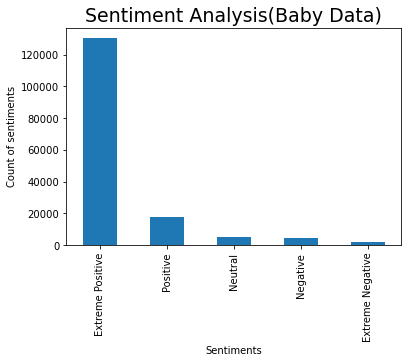

In [72]:
#plot and visualize the counts

baby_review_4['Sentiments'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis(Baby Data)',fontsize=19)
plt.xlabel('Sentiments')
plt.ylabel('Count of sentiments')
plt.show()

In [73]:
def wordcloud(df,name):
    words = " ".join(sent for sent in df['reviews'])
    #print(words)
    wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(words)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(name,fontsize=25)
    plt.show()

##### Extreme positive data

In [74]:
pd.set_option('display.max_colwidth',None)
baby_Extreme_positive[['asin','reviews','Sentiment_score']].head(2)

,asin,reviews,Sentiment_score
0,097293751X,perfect new parent able keep track baby feed sleep diaper change schedule first two half months life make life easier doctor would ask question habit right awesine,0.7579
2,097293751X,help know exactly baby day go mother law watch go work also section write note let know anything may need happier book grandmother watch baby,0.7269


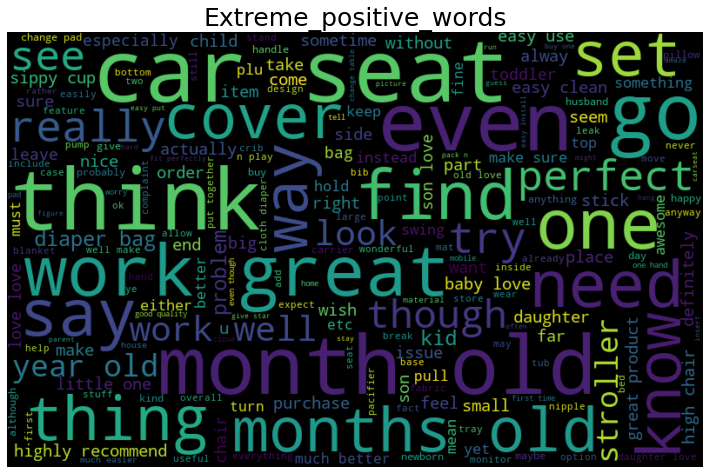

In [75]:
wordcloud(baby_Extreme_positive,'Extreme_positive_words')

In [76]:
#baby_review_epos.to_csv("baby_epos.csv")

##### Positive data

In [77]:
baby_positive[['asin','reviews','Sentiment_score']].head(2)

,asin,reviews,Sentiment_score
1,097293751X,book life saver helpful able go back track trend answer pediatrician question communicate different time night newborn think one things everyone require leave hospital go page newborn version move infant version finish second infant book third total right baby turn see things must have baby require new parent,0.3818
14,097293751X,like log think would work better clearer pm section page hours really need two page day baby feed wet lot early morning hours midnight cram blank space right need clearer pm,0.6597


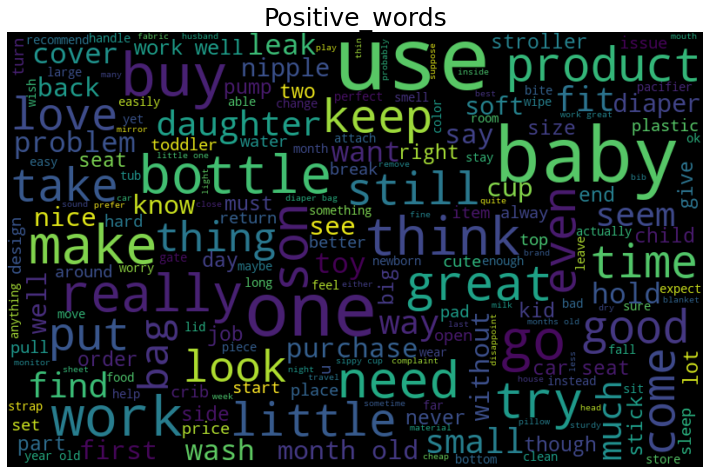

In [78]:
wordcloud(baby_positive,'Positive_words')

In [79]:
#baby_review_pos.to_csv("baby_pos.csv")

##### Negative data

In [80]:
baby_negative[['asin','reviews','Sentiment_score']].head(2)

,asin,reviews,Sentiment_score
10,097293751X,postpartum stay hospital nurse ask keep log baby feed urination bowel movements however get home nurse remind ask baby last bowel movement overwhelm new schedule even remember day daily tracker help us much get home baby cry time could sleep major problems breastfeed bad contact pediatrician hours on-call doctor look tracker realize trend baby feed long time wet diapers bowel movements indication baby dehydrate doctor suggest start pump breast milk see much get supplement formula sufficient breast milk finally come feed column write many ounces breast milk formula give long breast feed comment column use track much water drink drink enough make adequate supply breastmilk sure give horrible gas start track eat case food allergy peanut allergy family even write note first smile come visit ect keep memory box helpful reminder,-0.5106
73,B00002JV9S,teether ridiculous huge hard clamp daughter idea go start vibrate mouth big awkward hard push worth money opinion ridiculous design,-0.4939


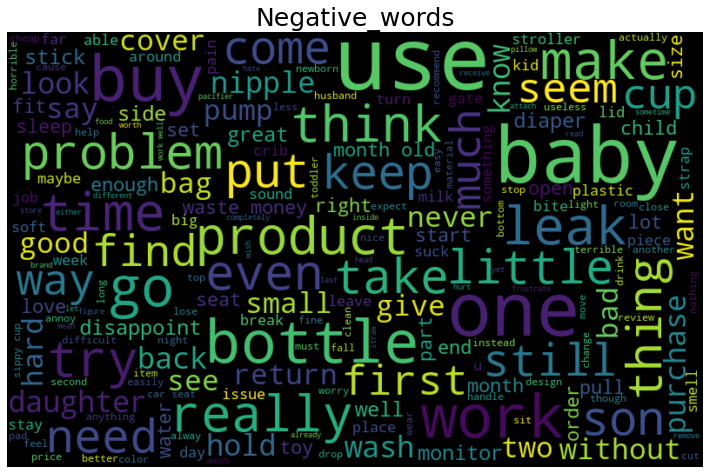

In [81]:
wordcloud(baby_negative,'Negative_words')

In [82]:
#baby_review_neg.to_csv("baby_neg.csv")

###### Extreme negative data

In [83]:
baby_Extreme_negative[['asin','reviews','Sentiment_score']].head(2)

,asin,reviews,Sentiment_score
23,9729375011,think would really use wrong hospital constantly ask last diaper eat long ummmm pain killers c-section mass hormones finally get start keep track use yes could use regular paper like layout page need slowly lst mind first weeks give shower gift next first time mom sleep deprive need keep track things,-0.7893
127,B00002JV9S,waste money son would rather suck finger use message corn teether massager really squeeze order work waste money,-0.8176


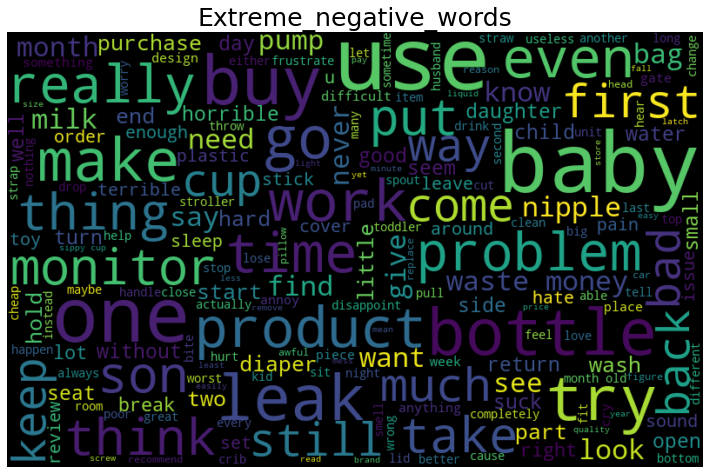

In [84]:
wordcloud(baby_Extreme_negative,'Extreme_negative_words')

In [85]:
#baby_review_eneg.to_csv("baby_eneg.csv")

##### Neutral data

In [86]:
baby_neutral[['asin','reviews','Sentiment_score']].head(2)

,asin,reviews,Sentiment_score
84,B00002JV9S,teether arrive ten month old seem cut second tooth already figure activate vibration soft yet ridge bump pull teeth gum think baby give star contradictory review whether batteries replaceable pack say unless whoever say replaceable handier rest us appear replaceable great little teether,0.1531
103,B00002JV9S,baby like massage action take time realize finally battery give nearly day battery would work short spurt rest waste money last,-0.0772


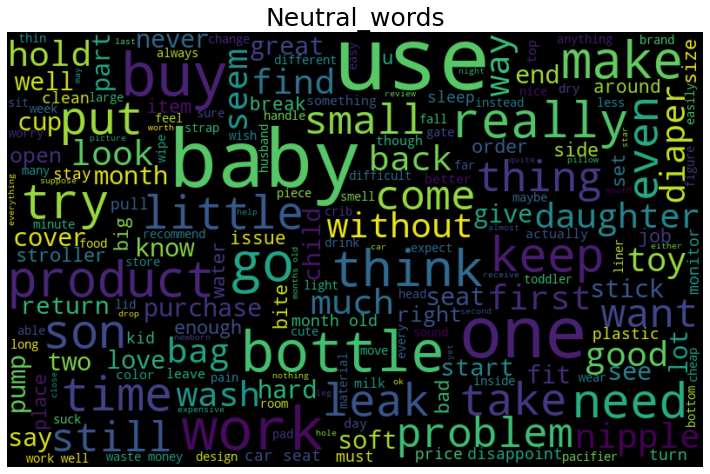

In [87]:
wordcloud(baby_neutral,'Neutral_words')

In [88]:
#baby_review_neu.to_csv("baby_neu.csv")

### Model Building

In [ ]:
#for model building use this notebook : final_project_baby_model_building 

## Problem statement 2

##### Identify the names of few products by analysing your input text data. For this task, downloading product names directly from any link is not allowed.


In [3]:
baby_review_6 = pd.read_csv('baby_nlp.csv')
baby_review_6.head(2)

,Unnamed: 0,reviewerID,asin,overall,reviewTime,helpful_score,reviews,Sentiment_score,Sentiments
0,0,A1HK2FQW6KXQB2,097293751X,5,2013-07-16,0.0,perfect new parent able keep track baby s feed...,0.7579,Extreme Positive
1,1,A19K65VY14D13R,097293751X,5,2013-06-29,0.0,book life saver helpful able go back track tre...,0.3818,Positive


In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")
#nouns = []
def productnames(doc1):
    noun=[]
    d=nlp(str(doc1))
    for token in d:
        if token.pos_ == 'NOUN':
            noun.append(token)
    print(noun)

In [17]:
baby_review_6[baby_review_6['asin']=='B004CL9YHS']


,Unnamed: 0,reviewerID,asin,overall,reviewTime,helpful_score,reviews,Sentiment_score,Sentiments
107425,107468,AA00TTJSPSN7T,B004CL9YHS,5,2014-06-23,0.0,using gate couple week not sure long time usag...,0.9566,Extreme Positive
107426,107469,A37ROZUHY9I4D9,B004CL9YHS,5,2014-01-26,0.0,got gate use dog keep kitchen leave house aren...,0.6908,Positive
107427,107470,AMWVN50IHWFIO,B004CL9YHS,5,2013-12-10,0.0,note first pulled box reading direction though...,0.9849,Extreme Positive
107428,107471,ACI7U365UW29D,B004CL9YHS,5,2012-12-12,0.0,hardware pressure mounted gate worth buying kn...,0.9396,Extreme Positive
107429,107472,AR3FQVK5RJGNQ,B004CL9YHS,5,2012-06-20,0.0,high quality gate easy use install look pretty...,0.9545,Extreme Positive
107430,107473,A1Y1L56592H2ZX,B004CL9YHS,3,2011-06-18,0.0,liked look baby gate dark wood metal instead p...,0.8625,Extreme Positive
107431,107474,A1OKSDRSOBXEZE,B004CL9YHS,5,2014-02-23,0.0,great sturdy gate son hang off s job also dece...,0.9418,Extreme Positive
107432,107475,A2RCQKONWZ21NZ,B004CL9YHS,4,2014-02-28,0.0,great gate wish le expensive could purchased o...,0.9670,Extreme Positive
107433,107476,A3CWB8ULOBCULL,B004CL9YHS,5,2014-01-13,0.0,love color easy open close even little one clo...,0.9567,Extreme Positive
107434,107477,AUEQD4S6TDLLI,B004CL9YHS,5,2012-08-06,0.0,great purchase match cherry wood floor blend r...,0.9397,Extreme Positive


In [6]:
doc1= baby_review_6['reviews'][155]
productnames(doc1)


[product, lot, room, store, diaper, smell, plunger, t, way, t, return, handle, position, garbage, bag, smell, container, garbage, bag, buy, champ]


In [8]:
doc1= baby_review_6['reviews'][1984]
productnames(doc1)


[bag, bag, breast, pad, purchase, reason, feature, bag, zip, lock, v, tie, air, way, room, freezer, freezer, shape, thawing, milk, spill, t, worry, split, freezer, lansinoh]


In [10]:
doc1= baby_review_6['reviews'][55484]
productnames(doc1)

[bottle, waste, money, trick, work, thing, baby, baby, hate, bottle, tear, bottle, price, shouldn, t, trick, bottle, work, playtex, guess, leak, mom, blog, trick, bottle, grief, favor, drip, bottle, drain, bottle, mess, need, leak, sieve]


In [16]:
doc1= baby_review_6['reviews'][92790]
productnames(doc1)

[set, addition, playroom, sticker, sheet, hour, order, kink, packaging, sticker, number, process, hour, hang, color, latte, month, issue, day, brand, quality, daughter, playroom, decor]


In [19]:
doc1= baby_review_6['reviews'][107425]
productnames(doc1)

[gate, week, time, usage, gate, stair, cherry, wood, install, pressure, method, decide, screw]


## Problem Statement 3

##### Predict future data trends: How the sentiments of reviewers change with time. Suppose input data is provided for the period 1996-2014. Your task is to predict the trends after 2014.


In [95]:
#!pip install pmdarima

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima

# arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

#ACF, PACF, MSE
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# warning
import warnings
warnings.filterwarnings('ignore')

Negative data

In [3]:
baby_date = pd.read_csv('baby_nlp.csv', index_col="reviewTime",parse_dates=True)
baby_date.head(2)

,Unnamed: 0,reviewerID,asin,overall,helpful_score,reviews,Sentiment_score,Sentiments
reviewTime,,,,,,,,
2013-07-16,0,A1HK2FQW6KXQB2,097293751X,5,0.0,perfect new parent able keep track baby s feed...,0.7579,Extreme Positive
2013-06-29,1,A19K65VY14D13R,097293751X,5,0.0,book life saver helpful able go back track tre...,0.3818,Positive


In [4]:
baby_date=baby_date.drop(['Unnamed: 0','reviewerID'], axis = 1)


In [5]:
baby_date.dtypes

asin                object
overall              int64
helpful_score      float64
reviews             object
Sentiment_score    float64
Sentiments          object
dtype: object

In [6]:
baby_Extreme_positive1 = baby_date[baby_date['Sentiments'] == 'Extreme Positive']
baby_positive1 = baby_date[baby_date['Sentiments'] == 'Positive']
baby_neutral1 = baby_date[baby_date['Sentiments'] == 'Neutral']
baby_negative1 = baby_date[baby_date['Sentiments'] == 'Negative']
baby_Extreme_negative1 = baby_date[baby_date['Sentiments'] == 'Extreme Negative']

In [7]:
baby_Extreme_positivef=baby_Extreme_positive1[['Sentiment_score','overall','helpful_score']].resample('m').mean().interpolate(method='linear')

baby_positivef=baby_positive1[['Sentiment_score','overall','helpful_score']].resample('m').mean().interpolate(method='linear')
baby_neutralf=baby_neutral1[['Sentiment_score','overall','helpful_score']].resample('m').mean().interpolate(method='linear')
baby_negativef=baby_negative1[['Sentiment_score','overall','helpful_score']].resample('m').mean().interpolate(method='linear')
baby_Extreme_negativef=baby_Extreme_negative1[['Sentiment_score','overall','helpful_score']].resample('m').mean().interpolate(method='linear')

In [8]:
'''exog1=baby_Extreme_positive1[['overall','helpful_score']].resample('q').mean().interpolate(method='linear')
exog2=baby_positive1[['overall','helpful_score']].resample('q').mean().interpolate(method='linear')
exog3=baby_neutral1[['overall','helpful_score']].resample('q').mean().interpolate(method='linear')
exog4=baby_negative1[['overall','helpful_score']].resample('q').mean().interpolate(method='linear')
exog5=baby_Extreme_negative1[['overall','helpful_score']].resample('q').mean().interpolate(method='linear')
'''
baby_Extreme_positivet=baby_Extreme_positivef[['Sentiment_score']]
baby_positivet=baby_positivef[['Sentiment_score']]
baby_neutralt=baby_neutralf[['Sentiment_score']]
baby_negativet=baby_negativef[['Sentiment_score']]
baby_Extreme_negativet=baby_Extreme_negativef[['Sentiment_score']]

In [103]:
print(baby_Extreme_positivet.isnull().sum())
print(baby_positivet.isnull().sum())
print(baby_neutralt.isnull().sum())
print(baby_negativet.isnull().sum())
print(baby_Extreme_negativet.isnull().sum())

Sentiment_score    0
dtype: int64
Sentiment_score    0
dtype: int64
Sentiment_score    0
dtype: int64
Sentiment_score    0
dtype: int64
Sentiment_score    0
dtype: int64


In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
def decom(data):

    ts_comp=seasonal_decompose(data,period=12)
    d_trend=ts_comp.trend
    d_seasonal=ts_comp.seasonal
    #plot the components
    _,ax=plt.subplots(2,1,figsize=(18,10))

    plt.subplot(211)
    plt.plot(d_trend,label='Trend')
    plt.legend()

    plt.subplot(212)
    plt.plot(d_seasonal,label='d_seasonal')
    plt.legend()

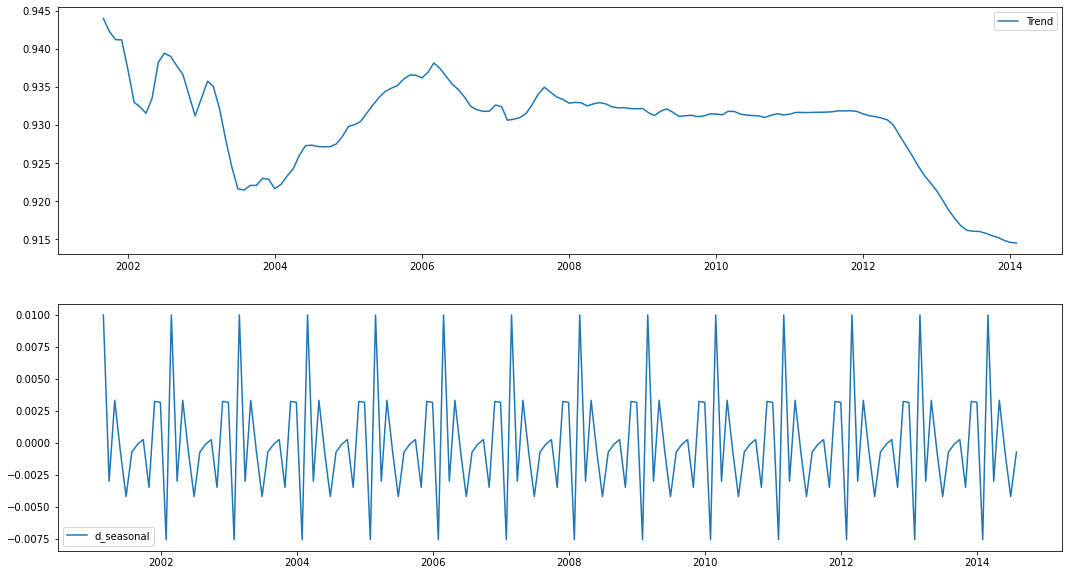

In [105]:
decom(baby_Extreme_positivet)

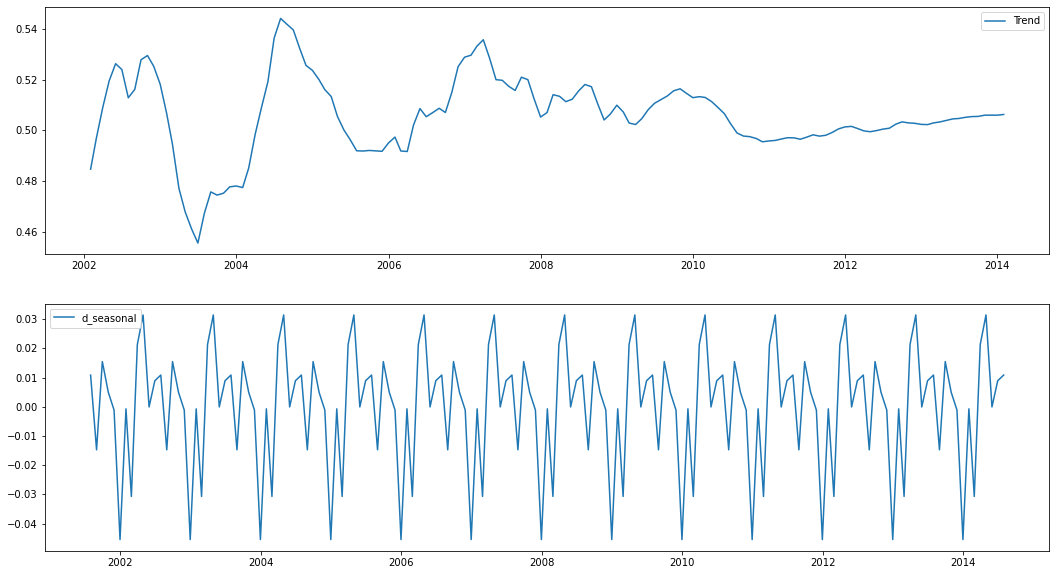

In [106]:
decom(baby_positivet)

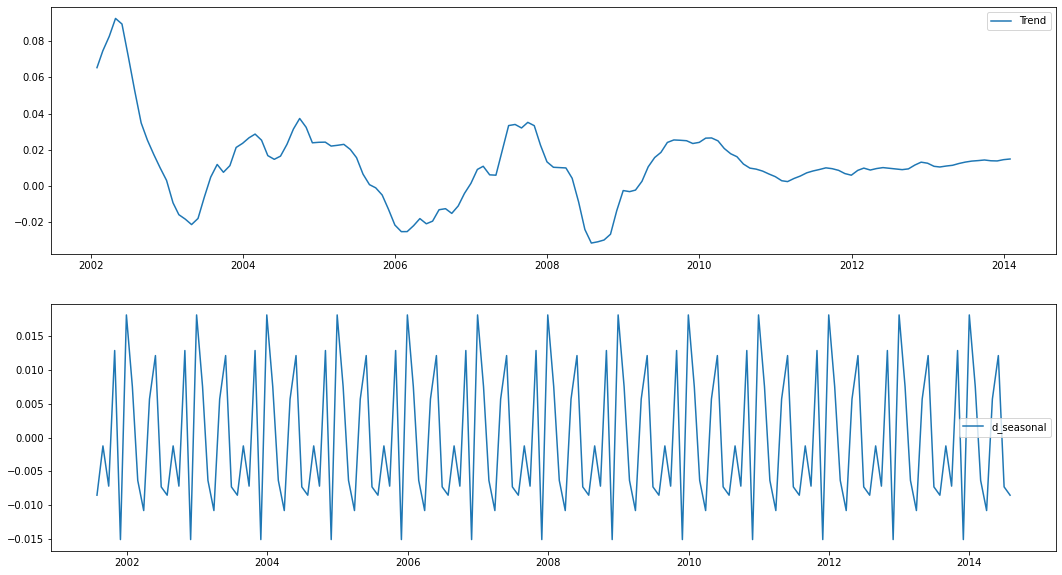

In [107]:
decom(baby_neutralt)

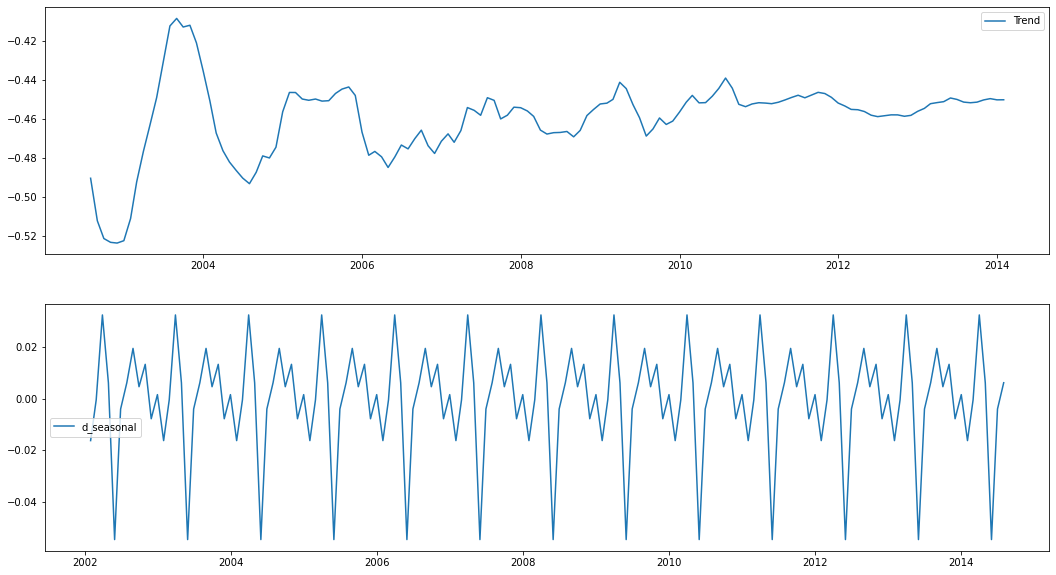

In [108]:
decom(baby_negativet)

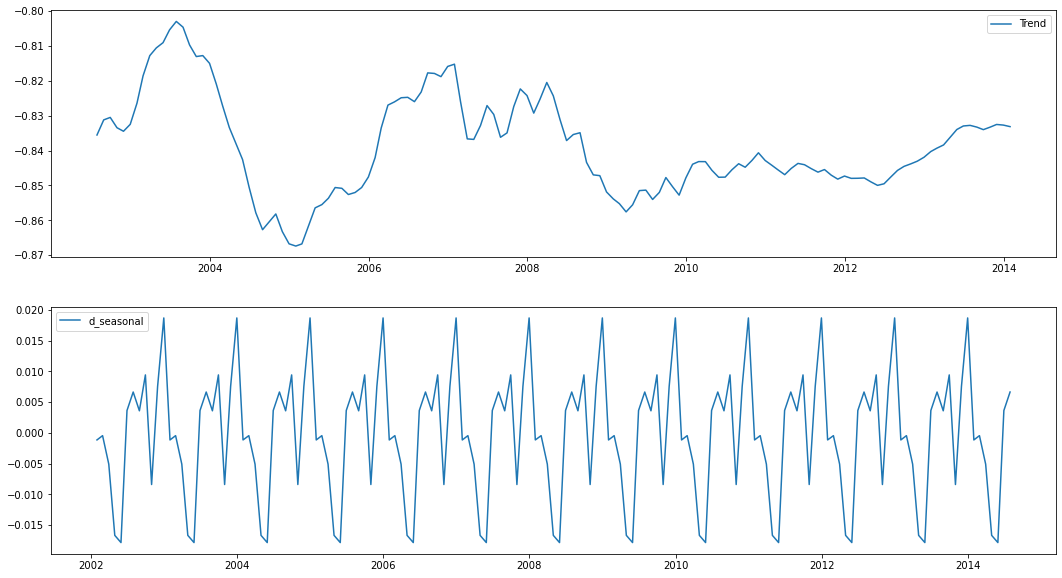

In [109]:
decom(baby_Extreme_negativet)

## check for stationarity

In [87]:
def checkStationarity(data):
    pvalue=adfuller(data)[1]
    if (pvalue < 0.05):
        ret = "pvalue = {}. Model is stationary. Proceed to model building".format(pvalue)
    else:
        ret = "pvalue = {}. Model is not stationary.Difference".format(pvalue)
    return(ret)  

In [111]:
checkStationarity(baby_Extreme_positivet)

'pvalue = 0.41280275019068535. Model is not stationary.Difference'

In [112]:
checkStationarity(baby_positivet)

'pvalue = 0.0002013820283542806. Model is stationary. Proceed to model building'

In [113]:
checkStationarity(baby_neutralt)

'pvalue = 9.766045278344709e-15. Model is stationary. Proceed to model building'

In [114]:
checkStationarity(baby_negativet)

'pvalue = 5.079361768623745e-09. Model is stationary. Proceed to model building'

In [115]:
checkStationarity(baby_Extreme_negativet)

'pvalue = 0.001039555649584729. Model is stationary. Proceed to model building'

# ACF and PACF

In [86]:
def acf_pacf(data):
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    sm.graphics.tsa.plot_acf(data.values.squeeze(), lags=12, ax=ax[0])
    sm.graphics.tsa.plot_pacf(data.values.squeeze(), lags=12, ax=ax[1])
    plt.show()

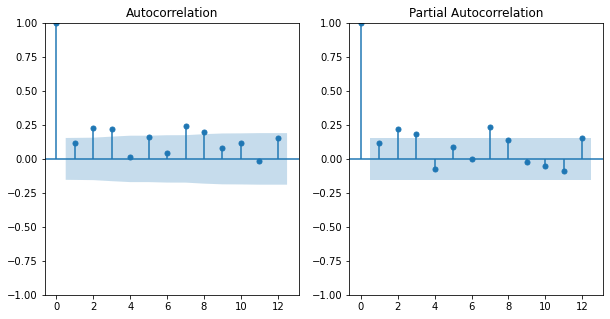

In [117]:
acf_pacf(baby_Extreme_positivet)

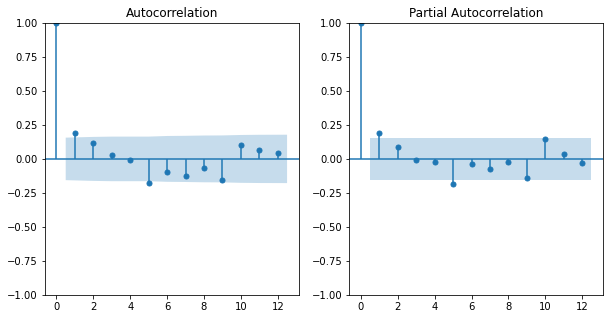

In [118]:
acf_pacf(baby_positivet)

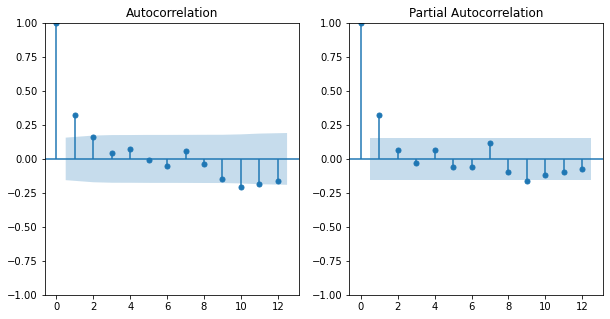

In [119]:
acf_pacf(baby_neutralt)

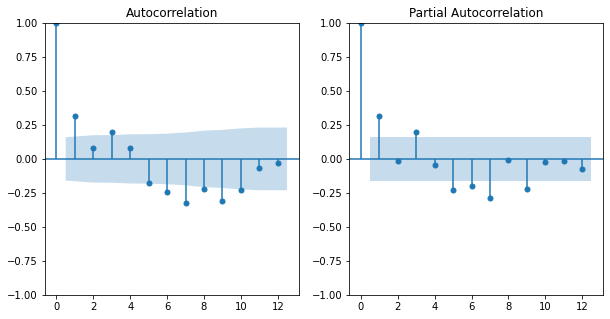

In [120]:
acf_pacf(baby_negativet)

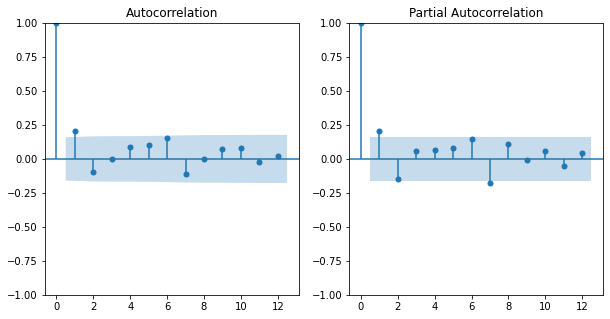

In [121]:
acf_pacf(baby_Extreme_negativet)

In [122]:
a=['baby_Extreme_positive','baby_positive','baby_neutral','baby_negative','baby_Extreme_negative']

## split

In [9]:

ss1=int(len(baby_Extreme_positivef)*0.7)
traint1=baby_Extreme_positivef.iloc[:ss1]
testt1=baby_Extreme_positivef.iloc[ss1:]

ss2=int(len(baby_positivef)*0.7)
traint2=baby_positivef.iloc[:ss2]
testt2=baby_positivef.iloc[ss2:]

ss3=int(len(baby_neutralf)*0.7)
traint3=baby_neutralf.iloc[:ss3]
testt3=baby_neutralf.iloc[ss3:]

ss4=int(len(baby_negativef)*0.7)
traint4=baby_negativef.iloc[:ss4]
testt4=baby_negativef.iloc[ss4:]

ss5=int(len(baby_Extreme_negativef)*0.7)
traint5=baby_Extreme_negativef.iloc[:ss5]
testt5=baby_Extreme_negativef.iloc[ss5:]

In [10]:
#baby_Extreme_positivef

In [11]:
exog1=traint1[['overall','helpful_score']].values
exog2=traint2[['overall','helpful_score']].values
exog3=traint3[['overall','helpful_score']].values
exog4=traint4[['overall','helpful_score']].values
exog5=traint5[['overall','helpful_score']].values

exogt1=testt1[['overall','helpful_score']].values
exogt2=testt2[['overall','helpful_score']].values
exogt3=testt3[['overall','helpful_score']].values
exogt4=testt4[['overall','helpful_score']].values
exogt5=testt5[['overall','helpful_score']].values

ARIMA model

In [126]:
testt1.head()

,Sentiment_score,overall,helpful_score
reviewTime,,,
2010-07-31,0.928949,4.415879,0.250637
2010-08-31,0.933410,4.400000,0.269066
2010-09-30,0.928897,4.344583,0.256467
2010-10-31,0.932146,4.367412,0.260485
2010-11-30,0.930736,4.382732,0.257445


In [94]:
def fun(data,data1,ex,ext,p,d,q):
    
    train = pd.DataFrame(data)
    test = pd.DataFrame(data1)
    #print(test)
    m1=ARIMA(train,order=(p,d,q),exog=ex).fit()
    global mse1
    
    
    f1=m1.forecast(len(test),exog=ext)
    #print(f1)
    actual=[]
    pred=[]
    for i in range(len(f1)):
        actual.append(test.Sentiment_score[i])
        pred.append(f1[i])
    df1=pd.DataFrame({'actual':actual,'predicted':pred})
    
    mse1=mean_squared_error(df1.actual,df1.predicted)
    
    return mse1

In [138]:
p=[0,1,2,3,4,5]
d=[0]
q=[0,1,2,3,4,5]
P=[];D=[];Q=[];RMSE=[]
for i in range(len(p)):
    for j in range(len(d)):
        for k in range(len(q)):
            
            fun(traint5.Sentiment_score,testt5.Sentiment_score,exog5,exogt5,p=p[i],d=d[j],q=q[k])
            P.append(p[i]);D.append(d[j]);Q.append(q[k]);RMSE.append(round(np.sqrt(mse1),3))

In [131]:
ex_pos=pd.DataFrame(zip(P,D,Q,RMSE),columns=['P','D','Q','RMSE']).sort_values(by='RMSE')[:1]
ex_pos

,P,D,Q,RMSE
0,0,1,0,0.012


In [133]:
pos=pd.DataFrame(zip(P,D,Q,RMSE),columns=['P','D','Q','RMSE']).sort_values(by='RMSE')[:1]
pos

,P,D,Q,RMSE
0,0,0,0,0.012


In [135]:
neu=pd.DataFrame(zip(P,D,Q,RMSE),columns=['P','D','Q','RMSE']).sort_values(by='RMSE')[:1]
neu

,P,D,Q,RMSE
32,5,0,2,0.015


In [137]:
neg=pd.DataFrame(zip(P,D,Q,RMSE),columns=['P','D','Q','RMSE']).sort_values(by='RMSE')[:1]
neg

,P,D,Q,RMSE
0,0,0,0,0.018


In [139]:
ex_neg=pd.DataFrame(zip(P,D,Q,RMSE),columns=['P','D','Q','RMSE']).sort_values(by='RMSE')[:1]
ex_neg

,P,D,Q,RMSE
1,0,0,1,0.014


In [12]:
m1=ARIMA(traint1.Sentiment_score,order=(0,1,0),exog=exog1).fit()
m2=ARIMA(traint2.Sentiment_score,order=(0,0,0),exog=exog2).fit()
m3=ARIMA(traint3.Sentiment_score,order=(5,0,2),exog=exog3).fit()
m4=ARIMA(traint4.Sentiment_score,order=(0,0,0),exog=exog4).fit()
m5=ARIMA(traint5.Sentiment_score,order=(0,0,1),exog=exog5).fit()

##### predicted values

In [60]:
f1=m1.forecast(len(testt1),exog=exogt1)
f2=m2.forecast(len(testt2),exog=exogt2)
f3=m3.forecast(len(testt3),exog=exogt3)
f4=m4.forecast(len(testt4),exog=exogt4)
f5=m5.forecast(len(testt5),exog=exogt5)



##### forecast values

In [66]:
pred1 = m1.predict(len(baby_Extreme_positivef),len(baby_Extreme_positivef)+15,exog=exog1[:65])
pred2 = m2.predict(len(baby_positivef),len(baby_positivef)+15,exog=exog2[:64])
pred3 = m3.predict(len(baby_neutralf),len(baby_neutralf)+15,exog=exog3[:64])
pred4 = m4.predict(len(baby_negativef),len(baby_negativef)+15,exog=exog4[:62])
pred5 = m5.predict(len(baby_Extreme_negativef),len(baby_Extreme_negativef)+15,exog=exog5[:62])



In [73]:
pred1_1=pd.concat([pd.Series(f1[[48]]),pred1])
pred2_1=pd.concat([pd.Series(f2[[47]]),pred2])
pred3_1=pd.concat([pd.Series(f3[[47]]),pred3])
pred4_1=pd.concat([pd.Series(f4[[45]]),pred4])
pred5_1=pd.concat([pd.Series(f5[[45]]),pred5])

In [53]:
def plot(test,pred,f,name,name2):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(test.Sentiment_score, label='Actual')
    ax.plot(pred, label='Forecast')
    ax.plot(f, label='Predict')
    plt.ylabel(name2,fontsize=20)
    plt.xlabel('Months',fontsize=20)
    leg = ax.legend(fontsize=15)
    plt.title(name,fontsize=24)


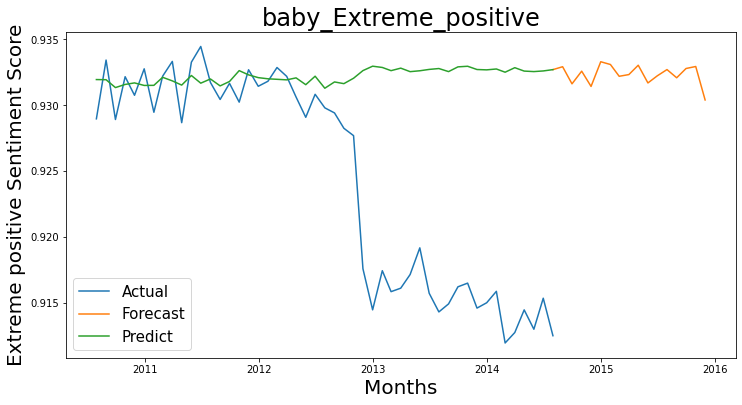

In [74]:
plot(testt1,pred1_1,f1,'baby_Extreme_positive','Extreme positive Sentiment Score')

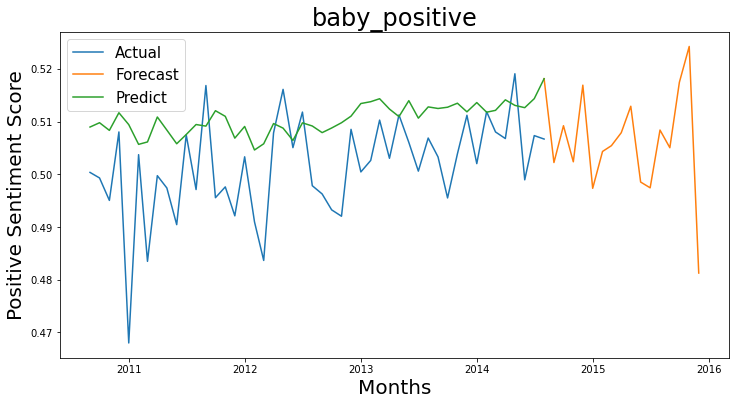

In [77]:
plot(testt2,pred2_1,f2,'baby_positive','Positive Sentiment Score')

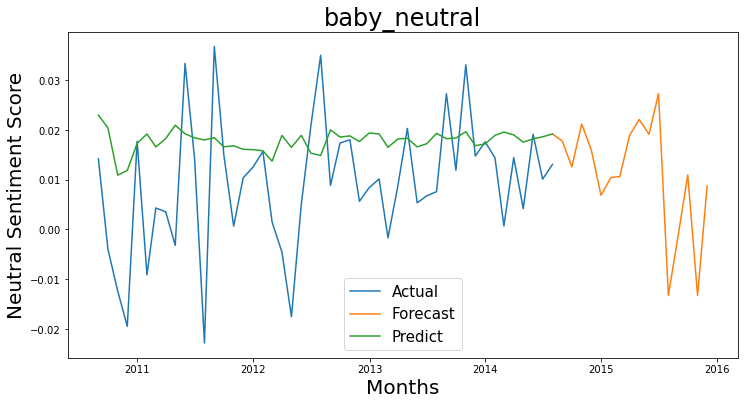

In [78]:
plot(testt3,pred3_1,f3,'baby_neutral','Neutral Sentiment Score')

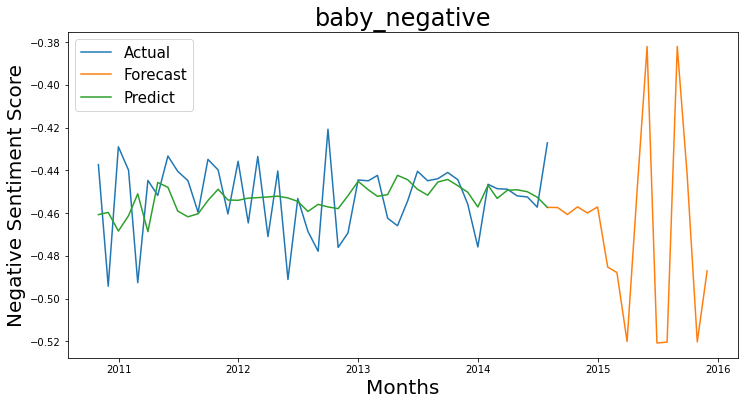

In [79]:
plot(testt4,pred4_1,f4,'baby_negative','Negative Sentiment Score')

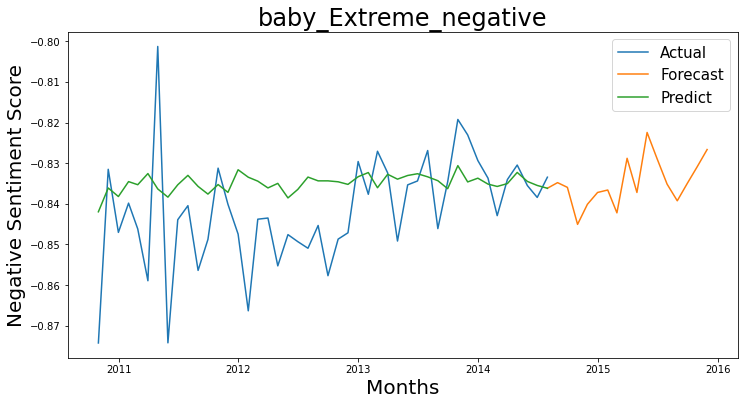

In [80]:
plot(testt5,pred5_1,f5,'baby_Extreme_negative','Negative Sentiment Score')

# Product 1

In [81]:
baby_date = pd.read_csv('baby_nlp.csv', index_col="reviewTime",parse_dates=True)
baby_date.head(2)

,Unnamed: 0,reviewerID,asin,overall,helpful_score,reviews,Sentiment_score,Sentiments
reviewTime,,,,,,,,
2013-07-16,0,A1HK2FQW6KXQB2,097293751X,5,0.0,perfect new parent able keep track baby s feed...,0.7579,Extreme Positive
2013-06-29,1,A19K65VY14D13R,097293751X,5,0.0,book life saver helpful able go back track tre...,0.3818,Positive


In [83]:
p=baby_date[baby_date['asin']=='B000IDSLOG']
p1=p[['Sentiment_score','overall','helpful_score']].resample('m').mean().interpolate(method='linear')
ps=p1[['Sentiment_score']]


In [84]:
p1.shape

(76, 3)

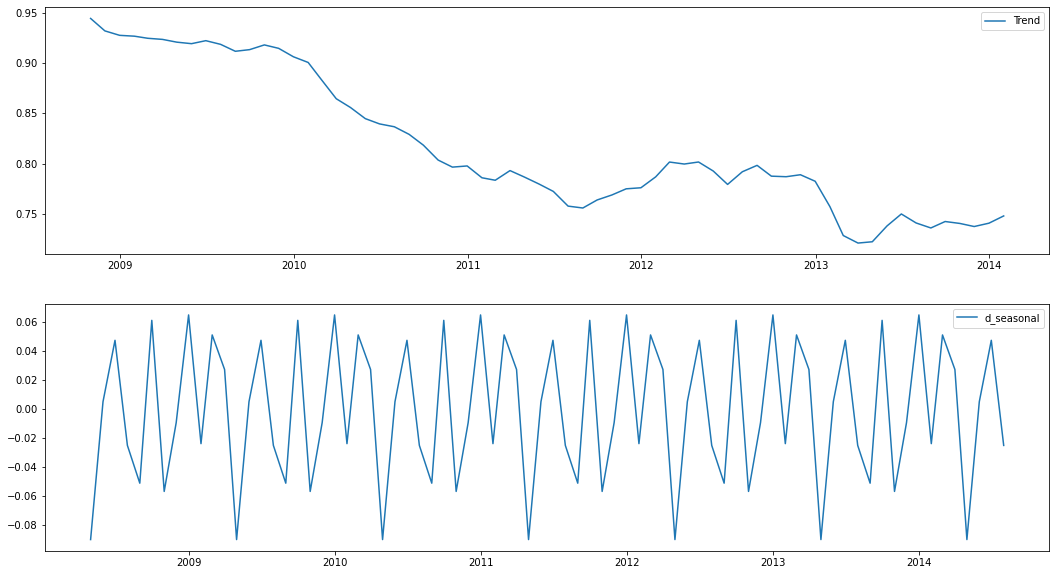

In [89]:
decom(ps)

In [90]:
checkStationarity(ps)

'pvalue = 0.11074462116494682. Model is not stationary.Difference'

In [91]:
ss1=int(len(p1)*0.7)
trainp1=p1.iloc[:ss1]
testp1=p1.iloc[ss1:]

exogp1=trainp1[['overall','helpful_score']].values
exogtp1=testp1[['overall','helpful_score']].values


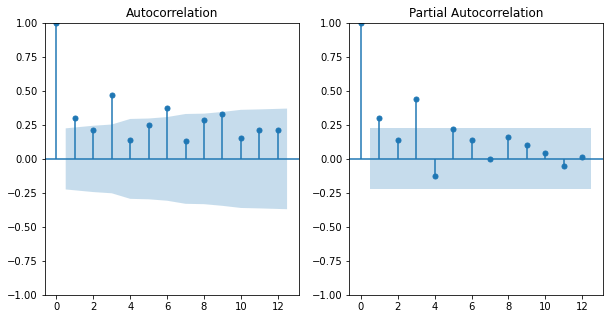

In [92]:
acf_pacf(ps)

In [95]:
p=[0,1,2,3,4]
d=[1]
q=[0,1,2]
P=[];D=[];Q=[];RMSE=[]
for i in range(len(p)):
    for j in range(len(d)):
        for k in range(len(q)):
            
            fun(trainp1.Sentiment_score,testp1.Sentiment_score,exogp1,exogtp1,p=p[i],d=d[j],q=q[k])
            P.append(p[i]);D.append(d[j]);Q.append(q[k]);RMSE.append(round(np.sqrt(mse1),3))

In [96]:
all_p1=pd.DataFrame(zip(P,D,Q,RMSE),columns=['P','D','Q','RMSE']).sort_values(by='RMSE')[:1]
all_p1

,P,D,Q,RMSE
5,1,1,2,0.13


In [98]:
mp1=ARIMA(trainp1.Sentiment_score,order=(1,1,2),exog=exogp1).fit()
fp1=mp1.forecast(len(testp1),exog=exogtp1)
predp1 = mp1.predict(len(p1),len(p1)+10,exog=exogp1[:34])


In [101]:
len(fp1)

23

In [102]:
predp1_1=pd.concat([pd.Series(fp1[[22]]),predp1])


In [105]:
def plotp1(test,pred,f,name,name2):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(test.Sentiment_score, label='Actual')
    ax.plot(pred, label='Forecast')
    ax.plot(f, label='Predict')
    plt.ylabel(name2,fontsize=20)
    plt.xlabel('Months',fontsize=20)
    leg = ax.legend(fontsize=15)
    plt.title(name,fontsize=24)


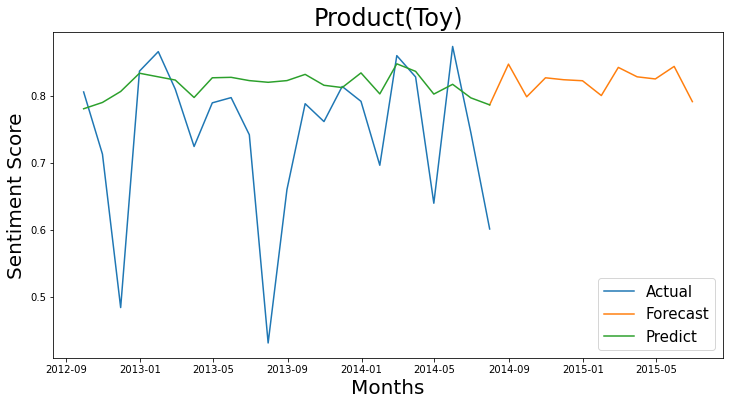

In [106]:
plotp1(testp1,predp1_1,fp1,'Product(Toy)','Sentiment Score')

# Product 2

In [108]:
baby_date.asin.value_counts()

B000IDSLOG    778
B00295MQLU    652
B0000DEW8N    497
B001U9OUYC    447
B000LXQVA4    407
             ... 
B000YZAG7I      2
B007HKOL7Y      2
B007HZ9YQC      1
B000YZD0QM      1
B001RAFWEG      1
Name: asin, Length: 7047, dtype: int64

In [140]:
p2=baby_date[baby_date['asin']=='B0000DEW8N']
p2=p2[['Sentiment_score','overall','helpful_score']].resample('m').mean().interpolate(method='linear')
ps2=p2[['Sentiment_score']]


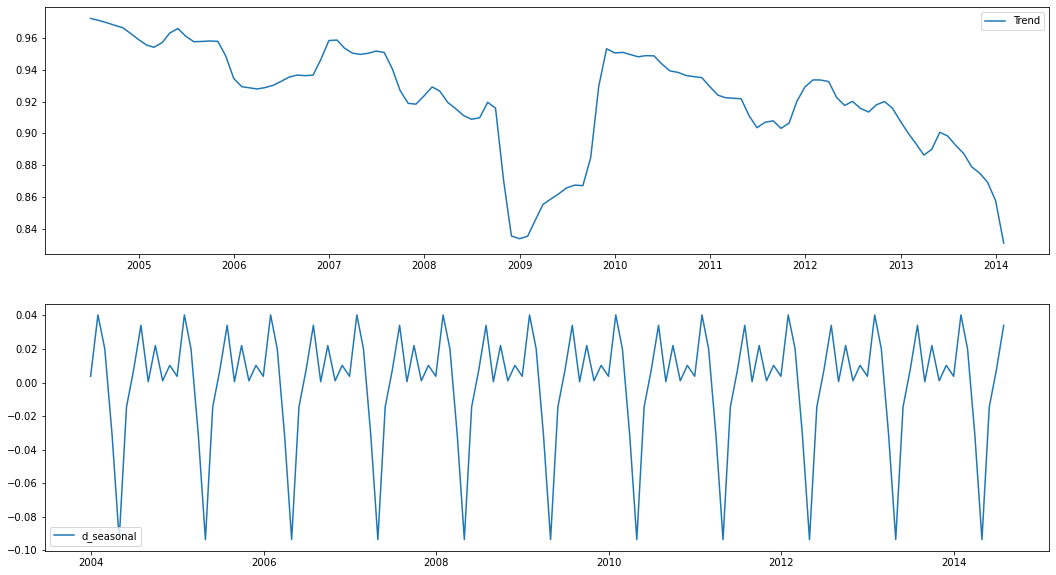

In [141]:
decom(ps2)

In [142]:
checkStationarity(ps2)

'pvalue = 2.3711709816106998e-08. Model is stationary. Proceed to model building'

In [143]:
ss2=int(len(p2)*0.7)
trainp2=p2.iloc[:ss2]
testp2=p2.iloc[ss2:]

exogp2=trainp2[['overall','helpful_score']].values
exogtp2=testp2[['overall','helpful_score']].values


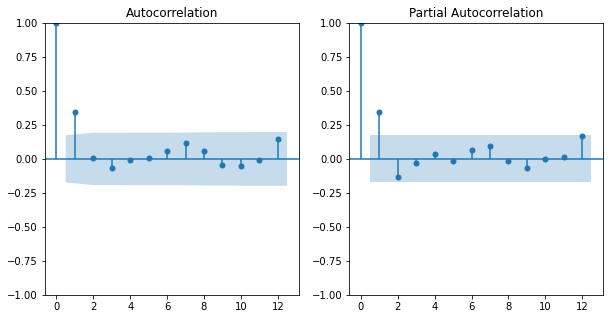

In [144]:
acf_pacf(ps2)

In [145]:
p=[0,1,2,3,4]
d=[0]
q=[0,1,2]
P=[];D=[];Q=[];RMSE=[]
for i in range(len(p)):
    for j in range(len(d)):
        for k in range(len(q)):
            
            fun(trainp2.Sentiment_score,testp2.Sentiment_score,exogp2,exogtp2,p=p[i],d=d[j],q=q[k])
            P.append(p[i]);D.append(d[j]);Q.append(q[k]);RMSE.append(round(np.sqrt(mse1),3))

In [146]:
all_p2=pd.DataFrame(zip(P,D,Q,RMSE),columns=['P','D','Q','RMSE']).sort_values(by='RMSE')[:1]
all_p2

,P,D,Q,RMSE
3,1,0,0,0.103


In [152]:
mp2=ARIMA(trainp2.Sentiment_score,order=(1,0,0),exog=exogp2).fit()
fp2=mp2.forecast(len(testp2),exog=exogtp2)
predp2 = mp2.predict(len(p2),len(p2)+10,exog=exogp2[:50])


In [153]:
len(fp2)

39

In [154]:
predp2_1=pd.concat([pd.Series(fp2[[38]]),predp2])


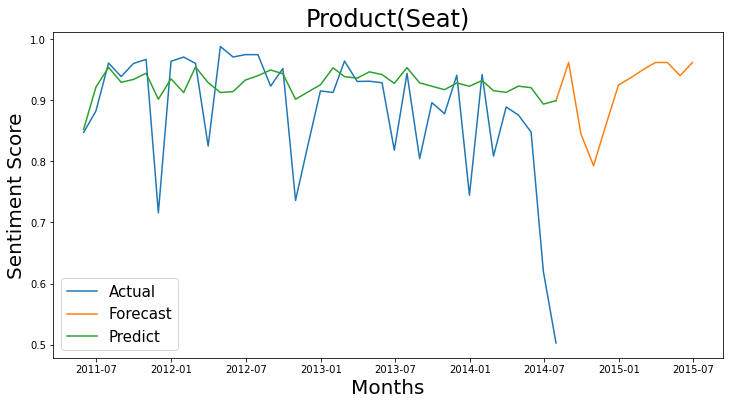

In [156]:
plotp1(testp2,predp2_1,fp2,'Product(Seat)','Sentiment Score')